# Etapa 01 | Importação e Exploração Inicial da Base

## Importação das bibliotecas essenciais para análise de dados

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

## Configurações para melhorar a visualização


**Configurações extras:**
- `plt.style.use('default')`: Define um estilo limpo para nossos gráficos
- `sns.set_palette("husl")`: Escolhe uma paleta de cores harmoniosa
- `plt.rcParams`: Configura tamanho padrão dos gráficos e fonte
- `pd.set_option`: Garante que veremos todas as colunas dos nossos DataFrames



In [2]:
plt.style.use("default")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

# Configuração para exibir todas as colunas do DataFrame

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

## Carregamento da base de dados

In [3]:
path = "C:/Users/bianc/OneDrive/Documents/2-Projetos/05_Statistical_Analysis_of_Salaries_in_Data/Statistical_Analysis_of_Salaries_in_Data/Data"

In [4]:
print(f"{path}/salario_profissionais_dados.csv")

C:/Users/bianc/OneDrive/Documents/2-Projetos/05_Statistical_Analysis_of_Salaries_in_Data/Statistical_Analysis_of_Salaries_in_Data/Data/salario_profissionais_dados.csv


In [5]:
df = pd.read_csv(path + "/salario_profissionais_dados.csv")

## Primeira exploração:


**`pd.read_csv()`:** Esta função é nossa "porta de entrada" para dados em formato CSV. O Pandas automaticamente detecta separadores, tipos de dados e estrutura do arquivo.

**`df.shape`:** Nos dá as dimensões da base (linhas x colunas). É fundamental saber o volume de dados que estamos analisando - isso impacta performance e estratégias de análise.

**`df.head()`:** Mostra as primeiras 5 linhas, como uma "amostra grátis" dos dados. Nos ajuda a visualizar a estrutura real e identificar padrões iniciais.

**`df.info()`:** É como um "raio-X" da nossa base. Mostra:
- Nome de cada coluna
- Quantidade de valores não-nulos
- Tipo de dados (int64, object, float64, etc.)
- Uso de memória

In [6]:
print("📊 INFORMAÇÕES GERAIS DA BASE")
print("=" * 50)
print(f"📏 Dimensões da base: {df.shape[0]} linhas e {df.shape[1]} colunas")
print(f"💾 Tamanho em memória: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

📊 INFORMAÇÕES GERAIS DA BASE
📏 Dimensões da base: 3755 linhas e 10 colunas
💾 Tamanho em memória: 1744.80 KB


In [7]:
display(df.head())

,work_year,country,region,experience_level,job_title,salary_in_usd,employee_residence,company_location,company_size,years_of_experience
0,2023,Spain,Europe,SE,Principal Data Scientist,85847,ES,ES,L,8
1,2023,United States of America,Americas,MI,ML Engineer,30000,US,US,S,5
2,2023,United States of America,Americas,MI,ML Engineer,25500,US,US,S,3
3,2023,Canada,Americas,SE,Data Scientist,175000,CA,CA,M,8
4,2023,Canada,Americas,SE,Data Scientist,120000,CA,CA,M,8


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   work_year            3755 non-null   int64 
 1   country              3755 non-null   object
 2   region               3755 non-null   object
 3   experience_level     3755 non-null   object
 4   job_title            3755 non-null   object
 5   salary_in_usd        3755 non-null   int64 
 6   employee_residence   3755 non-null   object
 7   company_location     3755 non-null   object
 8   company_size         3755 non-null   object
 9   years_of_experience  3755 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 293.5+ KB


## Verificação de valores nulos

**`df.isnull().sum()`:** Conta quantos valores nulos (NaN, None, vazios) existem em cada coluna. Valores nulos podem indicar problemas na coleta de dados ou campos opcionais.

**Percentual de nulos:** Calculamos `(nulos / total) * 100` para entender a proporção. Se uma coluna tem 50% de valores nulos, talvez não seja confiável para análise.

**`df.dropna().shape[0]`:** Conta quantos registros estão "completos" (sem nenhum valor nulo). Isso nos ajuda a decidir se precisamos fazer limpeza de dados.

**`nunique()`:** Conta valores únicos em colunas categóricas. Por exemplo, se `job_title` tem 50 categorias únicas, sabemos que temos 50 cargos diferentes para analisar.

In [9]:
print("🔍 AUDITORIA DE QUALIDADE DOS DADOS")
print("=" * 50)
print("📊 Valores nulos por coluna:")
valores_nulos = df.isnull().sum()
percentual_nulos = (valores_nulos / len(df)) * 100

# Criando um resumo organizado
resumo_nulos = pd.DataFrame({
    "Valores Nulos": valores_nulos,
    "Percentual": percentual_nulos.round(2)
}) 

print(resumo_nulos)

print(f"\n✅ Total de registros: {len(df)}")
print(f"📈 Registros completos: {df.dropna().shape[0]}")
print(f"⚠️  Registros com dados faltantes: {df.shape[0] - df.dropna().shape[0]}")

🔍 AUDITORIA DE QUALIDADE DOS DADOS
📊 Valores nulos por coluna:
                     Valores Nulos  Percentual
work_year                        0         0.0
country                          0         0.0
region                           0         0.0
experience_level                 0         0.0
job_title                        0         0.0
salary_in_usd                    0         0.0
employee_residence               0         0.0
company_location                 0         0.0
company_size                     0         0.0
years_of_experience              0         0.0

✅ Total de registros: 3755
📈 Registros completos: 3755
⚠️  Registros com dados faltantes: 0


## Verificação dos tipos de dados únicos por coluna categórica

In [10]:
print("\n🏷️  CATEGORIAS ÚNICAS NAS PRINCIPAIS COLUNAS:")
print("=" * 50)
colunas_categoricas = ['experience_level', 'job_title', 'company_size', 'country']
for coluna in colunas_categoricas:
    if coluna in df.columns:
        print(f"{coluna}: {df[coluna].nunique()} categorias únicas")


🏷️  CATEGORIAS ÚNICAS NAS PRINCIPAIS COLUNAS:
experience_level: 4 categorias únicas
job_title: 93 categorias únicas
company_size: 3 categorias únicas
country: 78 categorias únicas


## Análise estatística

**`.describe()`:** É como um "resumo executivo" da nossa variável. Nos dá count (quantidade), mean (média), std (desvio padrão), min/max (extremos) e quartis (25%, 50%, 75%).

**Amplitude:** A diferença entre maior e menor salário nos mostra a "extensão" do mercado salarial.

**Coeficiente de Variação:** É o desvio padrão dividido pela média, multiplicado por 100. Nos diz o quão "espalhados" estão os salários. Acima de 30% indica alta variabilidade.

**Quartis:** Dividem nossos dados em 4 partes iguais:
- Q1 (25%): 25% dos profissionais ganham menos que este valor
- Q2 (50% = mediana): metade ganha menos, metade ganha mais
- Q3 (75%): apenas 25% ganham mais que este valor

**IQR (Amplitude Interquartil):** A diferença entre Q3 e Q1. Representa onde estão concentrados 50% dos salários "centrais", excluindo os extremos.


In [11]:
# Análise estatística descritiva da variável salary_in_usd
print("💰 ANÁLISE ESTATÍSTICA DOS SALÁRIOS")
print("=" * 50)

# Estatísticas descritivas completas
estatisticas = df["salary_in_usd"].describe()
print("📊 Estatísticas Descritivas:")
print(estatisticas)

💰 ANÁLISE ESTATÍSTICA DOS SALÁRIOS
📊 Estatísticas Descritivas:
count      3755.000000
mean     137570.389880
std       63055.625278
min        5132.000000
25%       95000.000000
50%      135000.000000
75%      175000.000000
max      450000.000000
Name: salary_in_usd, dtype: float64


In [12]:
# Cálculos adicionais importantes
print(f"\n🎯 MÉTRICAS COMPLEMENTARES:")
print("=" * 30)
print(f"📈 Amplitude (Max - Min): ${df['salary_in_usd'].max() - df['salary_in_usd'].min():,.0f}")
print(f"🎢 Coeficiente de Variação: {(df['salary_in_usd'].std() / df['salary_in_usd'].mean()) * 100:.1f}%")



🎯 MÉTRICAS COMPLEMENTARES:
📈 Amplitude (Max - Min): $444,868
🎢 Coeficiente de Variação: 45.8%


In [13]:
# Identificação de quartis para entender a distribuição
q1 = df['salary_in_usd'].quantile(0.25)
q3 = df['salary_in_usd'].quantile(0.75)
iqr = q3 - q1

print(f"📊 1º Quartil (25%): ${q1:,.0f}")
print(f"📊 3º Quartil (75%): ${q3:,.0f}")
print(f"📏 Amplitude Interquartil (IQR): ${iqr:,.0f}")

📊 1º Quartil (25%): $95,000
📊 3º Quartil (75%): $175,000
📏 Amplitude Interquartil (IQR): $80,000


## Visulização gráfica

**Histograma:** Mostra a "forma" da distribuição. Se vemos uma curva normal, os salários estão bem distribuídos. Se há "picos", indica concentrações em faixas específicas.

**Boxplot:** É como um "resumo visual" dos quartis. A caixa mostra onde estão 50% dos dados centrais, e os "bigodes" mostram a extensão. Pontos fora dos bigodes são outliers.

**Boxplot por categoria:** Compara distribuições entre grupos. Podemos ver rapidamente se seniores ganham mais que juniores, ou se empresas grandes pagam melhor.

**Detecção de outliers:** Usamos a regra estatística padrão: valores além de 1.5 * IQR dos quartis são considerados outliers. Eles podem representar:
- Cargos muito especializados (salários altos)
- Erros de digitação (salários irreais)
- Mercados específicos (países com economia diferente)

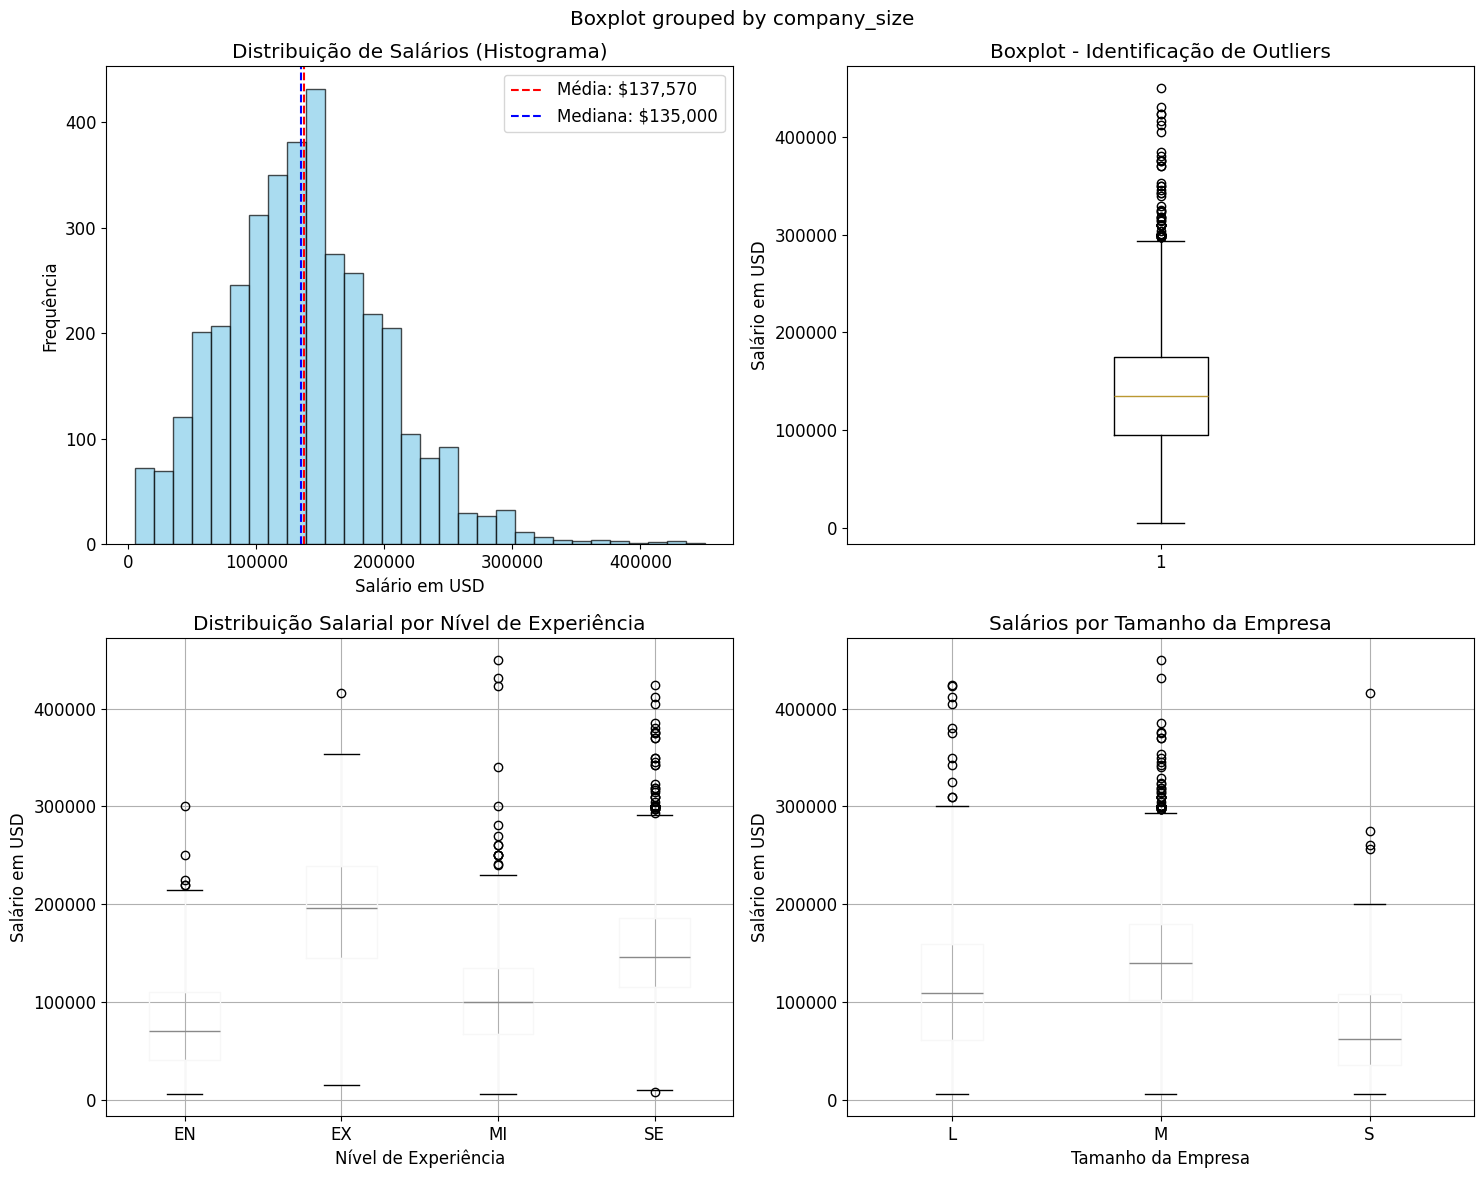


🎯 ANÁLISE DE OUTLIERS:
📊 Total de outliers detectados: 63
📈 Outliers representam: 1.7% da base
💰 Maior outlier: $450,000
💸 Menor outlier: $297,300


In [14]:
# Criação de visualizações para entender a distribuição salarial
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle("Análise Visual da Distribuição Salarial", fontsize=16, fontweight="bold")

# 1. Histograma da distribuição salarial
axes[0, 0].hist(df["salary_in_usd"], bins=30, color="skyblue", alpha=0.7, edgecolor="black")
axes[0, 0].set_title("Distribuição de Salários (Histograma)")
axes[0, 0].set_xlabel("Salário em USD")
axes[0, 0].set_ylabel("Frequência")
axes[0, 0].axvline(df["salary_in_usd"].mean(), color="red", linestyle="--", label=f"Média: ${df['salary_in_usd'].mean():,.0f}")
axes[0, 0].axvline(df["salary_in_usd"].median(), color="blue", linestyle="--", label=f"Mediana: ${df['salary_in_usd'].median():,.0f}")
axes[0, 0].legend()

# 2. Boxplot da distribuição salarial
axes[0, 1].boxplot(df["salary_in_usd"])
axes[0, 1].set_title("Boxplot - Identificação de Outliers")
axes[0, 1].set_ylabel("Salário em USD")

# 3. Distribuição por nível de experiência
df.boxplot(column = "salary_in_usd", by="experience_level", ax=axes[1, 0])
axes[1, 0].set_title("Distribuição Salarial por Nível de Experiência")
axes[1, 0].set_xlabel("Nível de Experiência")
axes[1, 0].set_ylabel("Salário em USD")

# 4. Distribuição por tamanho da empresa
df.boxplot(column="salary_in_usd", by="company_size", ax=axes[1, 1])
axes[1, 1].set_title("Salários por Tamanho da Empresa")
axes[1, 1].set_xlabel("Tamanho da Empresa")
axes[1, 1].set_ylabel("Salário em USD")

plt.tight_layout()
plt.show()

# Análise de outliers
Q1 = df["salary_in_usd"].quantile(0.25)
Q3 = df["salary_in_usd"].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = df[(df["salary_in_usd"] < limite_inferior) | (df["salary_in_usd"] > limite_superior)]
print(f"\n🎯 ANÁLISE DE OUTLIERS:")
print("=" * 30)
print(f"📊 Total de outliers detectados: {len(outliers)}")
print(f"📈 Outliers representam: {(len(outliers)/len(df))*100:.1f}% da base")
if len(outliers) > 0:
    print(f"💰 Maior outlier: ${outliers['salary_in_usd'].max():,.0f}")
    print(f"💸 Menor outlier: ${outliers['salary_in_usd'].min():,.0f}")

# Etapa 02 | Frequência e Distribuição das Categorias

## Análise de frequência dos cargos mais comuns

**`.value_counts()`:** Conta quantas vezes cada valor único aparece na coluna. É como fazer um "censo" dos cargos - nos mostra quais são mais populares no mercado.

**`.head(10)`:** Limita aos 10 primeiros resultados. Em análise de dados, geralmente seguimos a "regra 80/20" - poucos cargos concentram a maioria dos profissionais.

**`normalize=True`:** Converte contagens absolutas em proporções (0 a 1). Multiplicando por 100, temos percentuais que são mais fáceis de interpretar.

**`nunique()`:** Conta valores únicos totais. Se temos 50 cargos únicos mas apenas 10 representam 80% da base, isso indica alta concentração em poucas funções.

In [15]:
print("👔 ANÁLISE DE CARGOS MAIS FREQUENTES")
print("=" * 50)

cargos_frequentes = df["job_title"].value_counts().head(10)
print("📊 Top 10 cargos na base de dados:")
print(cargos_frequentes)

# Calculando percentuais
print(f"\n📈 Percentual dos top 10 cargos:")
cargos_percentual = (df["job_title"].value_counts(normalize=True).head(10) * 100).round(1)
for cargo, percentual in cargos_percentual.items():
    print(f"{cargo}: {percentual}%")
    
print(f"\n💡 INSIGHTS PARA RH:")
print("=" * 30)
print(f"• Total de cargos únicos: {df['job_title'].nunique()}")
print(f"• Cargo mais comum: {cargos_frequentes.index[0]} ({cargos_frequentes.iloc[0]} profissionais)")
print(f"• Os top 3 cargos representam {cargos_percentual.head(3).sum():.1f}% da base")


👔 ANÁLISE DE CARGOS MAIS FREQUENTES
📊 Top 10 cargos na base de dados:
job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Applied Scientist              58
Data Science Manager           58
Research Engineer              37
Name: count, dtype: int64

📈 Percentual dos top 10 cargos:
Data Engineer: 27.7%
Data Scientist: 22.4%
Data Analyst: 16.3%
Machine Learning Engineer: 7.7%
Analytics Engineer: 2.7%
Data Architect: 2.7%
Research Scientist: 2.2%
Applied Scientist: 1.5%
Data Science Manager: 1.5%
Research Engineer: 1.0%

💡 INSIGHTS PARA RH:
• Total de cargos únicos: 93
• Cargo mais comum: Data Engineer (1040 profissionais)
• Os top 3 cargos representam 66.4% da base


## Análise de nível de experiência

In [16]:
print("🎯 ANÁLISE DE NÍVEIS DE EXPERIÊNCIA")
print("=" * 50)

experiencia_counts = df["experience_level"].value_counts()
experiencia_percentual = (df["experience_level"].value_counts(normalize=True) * 100).round(1)

print("📊 Distribuição por experiência:")
for nivel, count in experiencia_counts.items():
    percentual = experiencia_percentual[nivel]
    print(f"• {nivel}: {count} profissionais ({percentual}%)")


🎯 ANÁLISE DE NÍVEIS DE EXPERIÊNCIA
📊 Distribuição por experiência:
• SE: 2516 profissionais (67.0%)
• MI: 805 profissionais (21.4%)
• EN: 320 profissionais (8.5%)
• EX: 114 profissionais (3.0%)


## Análise de tamanho das empresas

In [17]:
print(f"\n🏢 ANÁLISE DE TAMANHO DAS EMPRESAS")
print("=" * 50)

empresa_counts = df["company_size"].value_counts()
empresa_percentual = (df["company_size"].value_counts(normalize=True) * 100).round(1)

print("📊 Distribuição por tamanho da empresa:")
for tamanho, count in empresa_counts.items():
    percentual = empresa_percentual[tamanho]
    print(f"• {tamanho}: {count} empresas ({percentual}%)")


🏢 ANÁLISE DE TAMANHO DAS EMPRESAS
📊 Distribuição por tamanho da empresa:
• M: 3153 empresas (84.0%)
• L: 454 empresas (12.1%)
• S: 148 empresas (3.9%)


## Análise de anos de trabalho


In [18]:
print(f"\n📅 ANÁLISE DE ANOS DE EXPERIÊNCIA")
print("=" * 50)

print("📊 Estatísticas de anos de experiência:")
print(f"• Média: {df['years_of_experience'].mean():.1f} anos")
print(f"• Mediana: {df['years_of_experience'].median():.1f} anos")
print(f"• Mínimo: {df['years_of_experience'].min()} anos")
print(f"• Máximo: {df['years_of_experience'].max()} anos")


📅 ANÁLISE DE ANOS DE EXPERIÊNCIA
📊 Estatísticas de anos de experiência:
• Média: 6.0 anos
• Mediana: 6.0 anos
• Mínimo: 1 anos
• Máximo: 10 anos


## Categorizando anos de experiência

In [19]:
def categorizar_experiencia(anos):
    if anos <= 2:
        return "Júnior (0-2 anos)"
    elif anos <= 5:
        return "Pleno (3-5 anos)"
    elif anos <= 10:
        return "Sênior (6-10 anos)"
    else:
        return "Especialista (10+ anos)"

df["categoria_experiencia"] = df['years_of_experience'].apply(categorizar_experiencia)

categoria_counts = df["categoria_experiencia"].value_counts()
categoria_percentual = (df["categoria_experiencia"].value_counts(normalize=True) * 100).round(1)

print(f"\n📊 Distribuição por categoria de experiência:")
for categoria, count in categoria_counts.items():
    percentual = categoria_percentual[categoria]
    print(f"• {categoria}: {count} profissionais ({percentual}%)")

print(f"\n💡 INSIGHTS ESTRATÉGICOS PARA RH:")
print("=" * 40)
print(f"• Nível mais comum: {experiencia_counts.index[0]} ({experiencia_percentual.iloc[0]}%)")
print(f"• Tipo de empresa predominante: {empresa_counts.index[0]} ({empresa_percentual.iloc[0]}%)")
print(f"• Categoria de experiência predominante: {categoria_counts.index[0]} ({categoria_percentual.iloc[0]}%)")
print(f"• Experiência média do mercado: {df['years_of_experience'].mean():.1f} anos")


📊 Distribuição por categoria de experiência:
• Sênior (6-10 anos): 2630 profissionais (70.0%)
• Pleno (3-5 anos): 805 profissionais (21.4%)
• Júnior (0-2 anos): 320 profissionais (8.5%)

💡 INSIGHTS ESTRATÉGICOS PARA RH:
• Nível mais comum: SE (67.0%)
• Tipo de empresa predominante: M (84.0%)
• Categoria de experiência predominante: Sênior (6-10 anos) (70.0%)
• Experiência média do mercado: 6.0 anos


## Criação de visualizações para as distribuições categóricas



**`.plot(kind='bar')`:** Cria gráfico de barras verticais. Ideal para comparar categorias com nomes curtos.

**`.plot(kind='barh')`:** Gráfico de barras horizontais. Melhor quando os rótulos são longos (como "Júnior (0-2 anos)").

**`.pie()`:** Gráfico de pizza. Excelente para mostrar proporções de um todo (tamanhos de empresa).

**`autopct='%1.1f%%'`:** Formata percentuais com 1 casa decimal no gráfico de pizza.

**`.text()`:** Adiciona valores numéricos nas barras. Facilita leitura sem precisar interpretar o eixo Y.

**`startangle=90`:** Inicia o gráfico de pizza no topo (12h), deixando mais organizado.

**`figsize=(16, 12)`:** Define tamanho da figura. Importante para visualizações que serão impressas ou apresentadas.


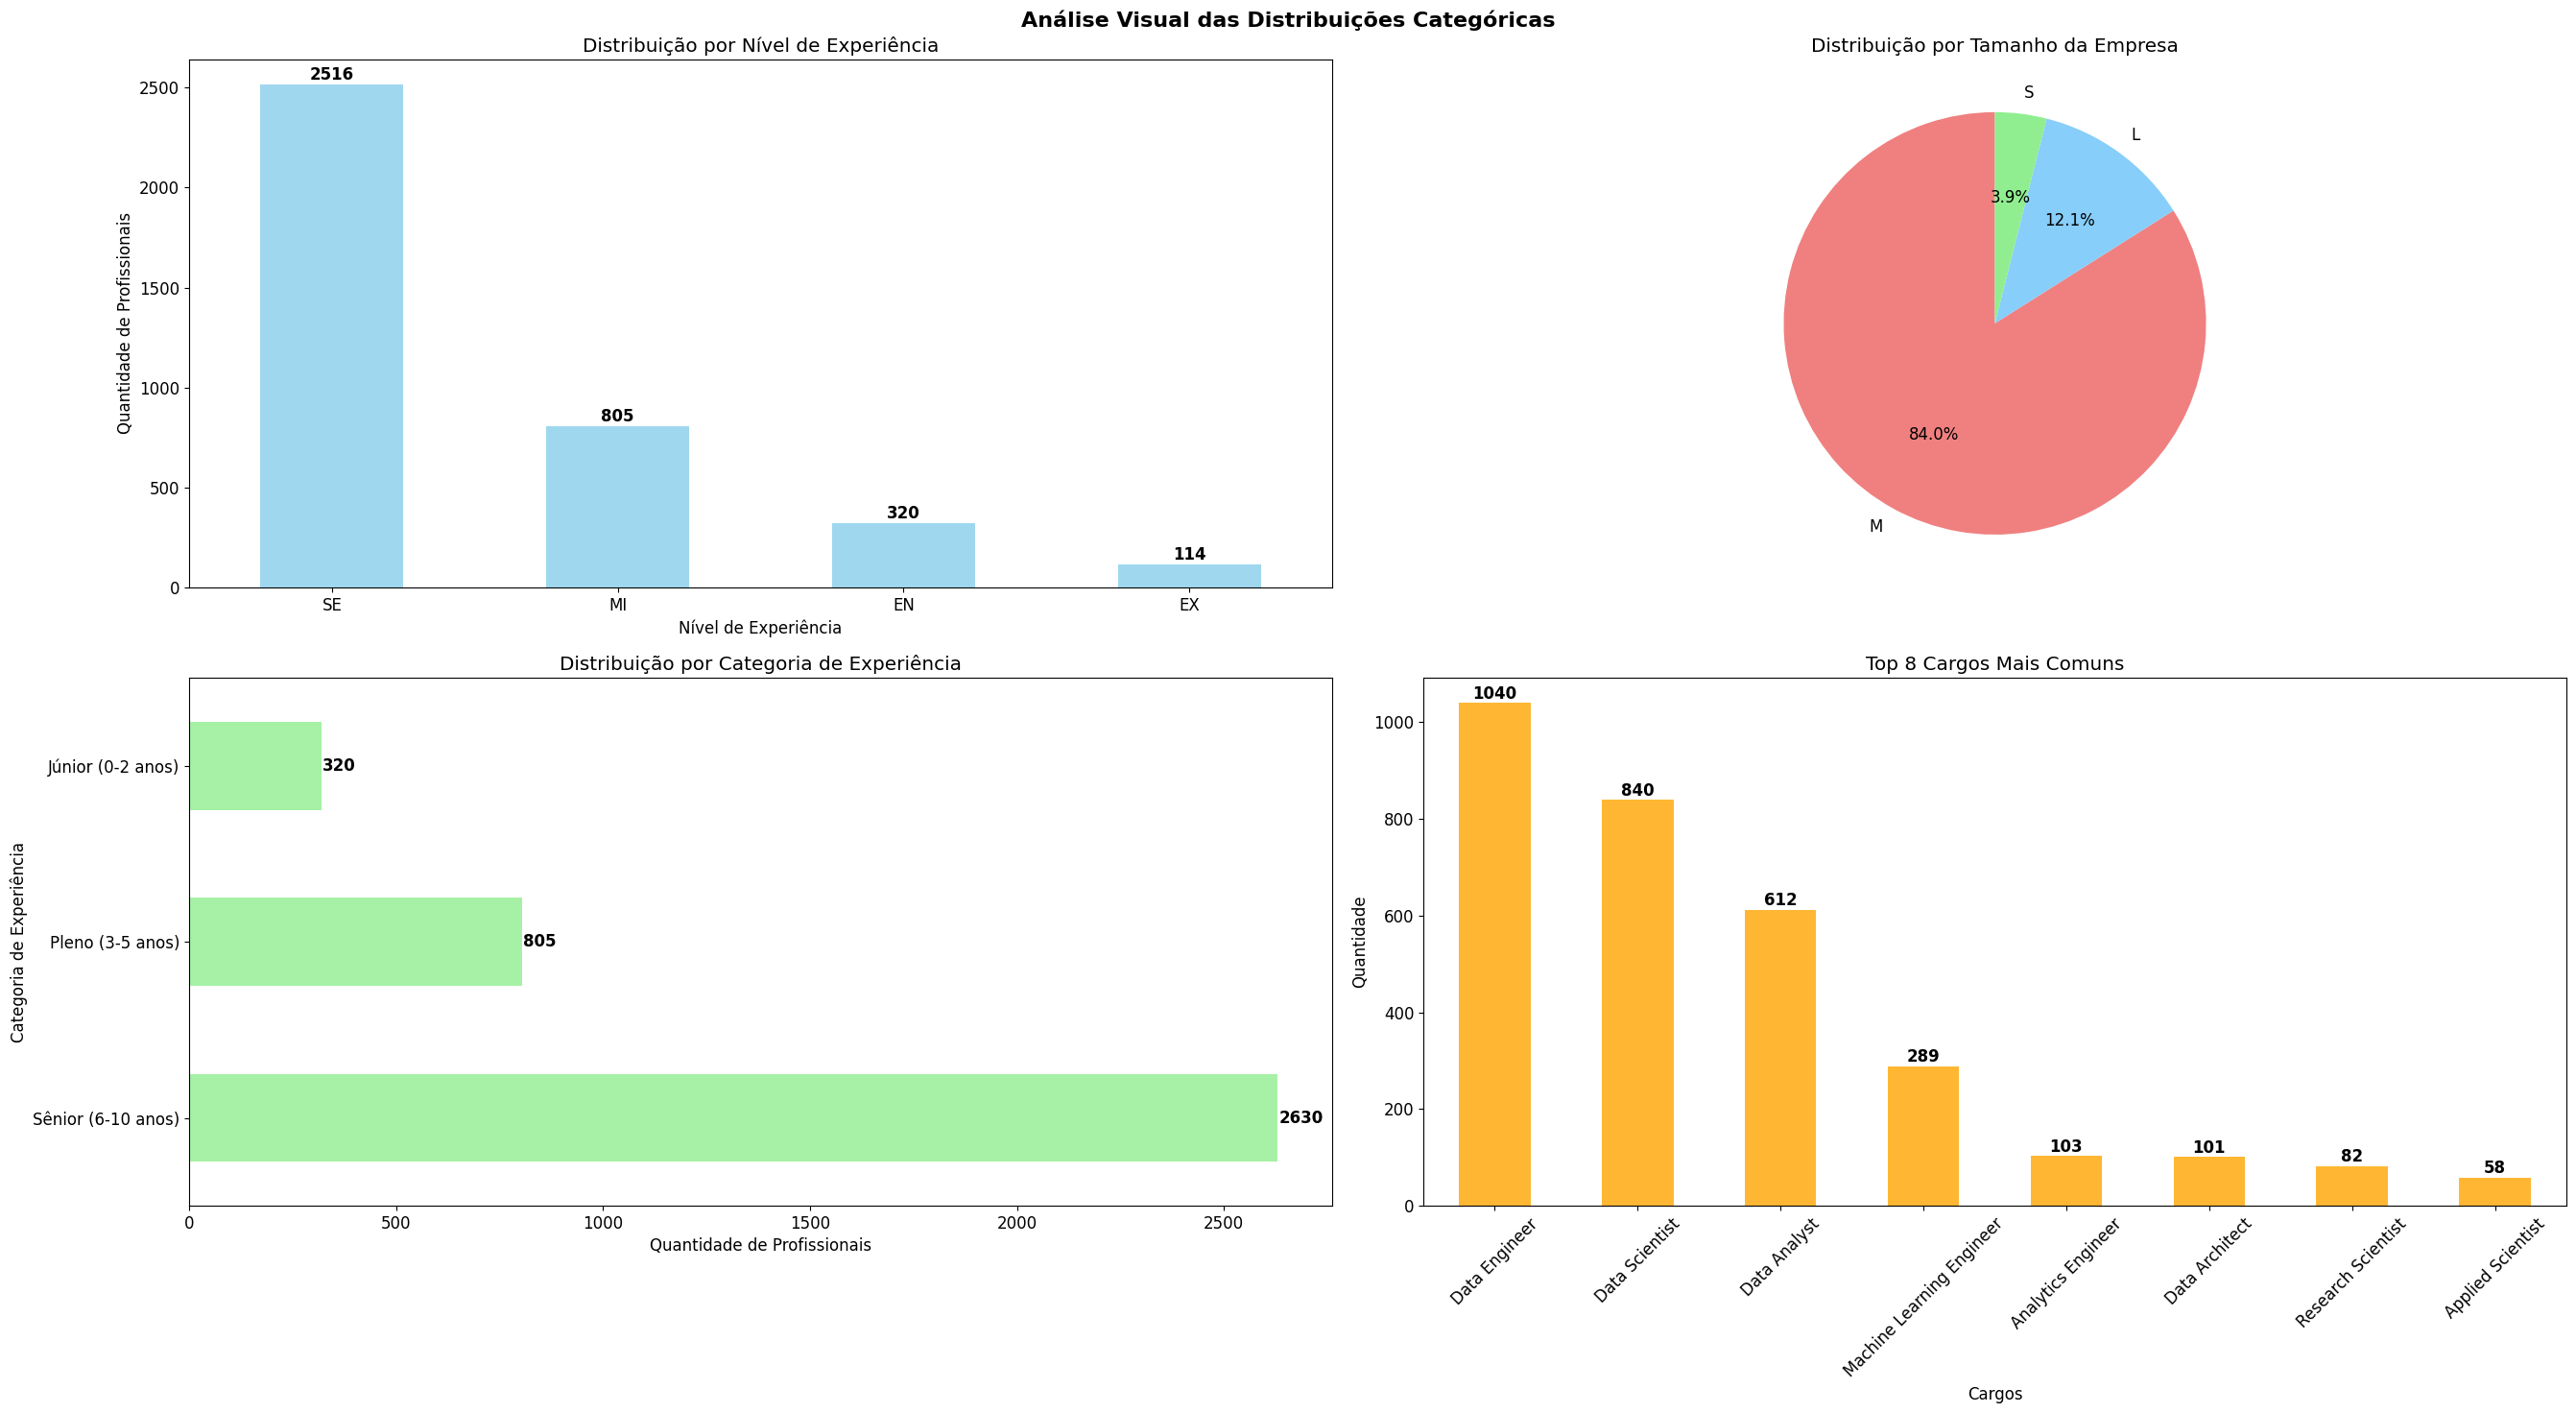


📋 RESUMO EXECUTIVO - PERFIL DA BASE DE DADOS
📊 Total de profissionais analisados: 3,755
🎯 Nível predominante: SE (67.0%)
🏢 Tipo de empresa predominante: M (84.0%)
👔 Cargo mais comum: Data Engineer (27.7%)
📅 Experiência média: 6.0 anos
🌍 Países representados: 78
💼 Cargos únicos: 93


In [30]:
fig, axes = plt.subplots(2, 2, figsize=(27, 15))
fig.suptitle("Análise Visual das Distribuições Categóricas", fontsize=16, fontweight='bold')

# 1. Distribuição de níveis de experiência (gráfico de barras)
experiencia_counts.plot(kind="bar", ax=axes[0, 0], color='skyblue', alpha=0.8)
axes[0, 0].set_title("Distribuição por Nível de Experiência")
axes[0, 0].set_xlabel("Nível de Experiência")
axes[0, 0].set_ylabel("Quantidade de Profissionais")
axes[0, 0].tick_params(axis='x', rotation=360)

# Adicionando valores nas barras
for i, v in enumerate(experiencia_counts.values):
    axes[0, 0].text(i, v + 5, str(v), ha="center", va="bottom", fontweight="bold")

# 2. Distribuição de tamanho das empresas (gráfico de pizza)
axes[0, 1].pie(empresa_counts.values, labels=empresa_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=["lightcoral", "lightskyblue", "lightgreen"])
axes[0, 1].set_title("Distribuição por Tamanho da Empresa")

# 3. Distribuição de categoria de experiência (gráfico de barras horizontal)
categoria_counts.plot(kind="barh", ax=axes[1, 0], color="lightgreen", alpha=0.8)
axes[1, 0].set_title("Distribuição por Categoria de Experiência")
axes[1, 0].set_xlabel("Quantidade de Profissionais")
axes[1, 0].set_ylabel("Categoria de Experiência")

# Adicionando valores nas barras horizontais
for i, v in enumerate(categoria_counts.values):
    axes[1, 0].text(v + 2, i, str(v), ha='left', va='center', fontweight='bold')

# 4. Top 8 cargos mais comuns (gráfico de barras)
top_cargos = df['job_title'].value_counts().head(8)
top_cargos.plot(kind='bar', ax=axes[1, 1], color='orange', alpha=0.8)
axes[1, 1].set_title('Top 8 Cargos Mais Comuns')
axes[1, 1].set_xlabel('Cargos')
axes[1, 1].set_ylabel('Quantidade')
axes[1, 1].tick_params(axis='x', rotation=45)

# Adicionando valores nas barras
for i, v in enumerate(top_cargos.values):
    axes[1, 1].text(i, v + 1, str(v), ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Tabela resumo executivo
print("\n📋 RESUMO EXECUTIVO - PERFIL DA BASE DE DADOS")
print("=" * 60)
print(f"📊 Total de profissionais analisados: {len(df):,}")
print(f"🎯 Nível predominante: {experiencia_counts.index[0]} ({experiencia_percentual.iloc[0]}%)")
print(f"🏢 Tipo de empresa predominante: {empresa_counts.index[0]} ({empresa_percentual.iloc[0]}%)")
print(f"👔 Cargo mais comum: {df['job_title'].value_counts().index[0]} ({(df['job_title'].value_counts(normalize=True).iloc[0]*100):.1f}%)")
print(f"📅 Experiência média: {df['years_of_experience'].mean():.1f} anos")
print(f"🌍 Países representados: {df['country'].nunique()}")
print(f"💼 Cargos únicos: {df['job_title'].nunique()}")